### Import essential packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob

### Import datasets

In [3]:
files = glob("datasets/book*.csv")
book_df = pd.concat((pd.read_csv(f) for f in files))
#book_df.to_csv("datasets/books_all.csv")

In [4]:
book_df.head(10)

,Id,Name,RatingDist1,pagesNumber,RatingDist4,RatingDistTotal,PublishMonth,PublishDay,Publisher,CountsOfReview,PublishYear,Language,Authors,Rating,RatingDist2,RatingDist5,ISBN,RatingDist3,Description,Count of text reviews
0,1,Harry Potter and the Half-Blood Prince (Harry ...,1:9896,652,4:556485,total:2298124,16,9,Scholastic Inc.,28062,2006,eng,J.K. Rowling,4.57,2:25317,5:1546466,NaN,3:159960,NaN,NaN
1,2,Harry Potter and the Order of the Phoenix (Har...,1:12455,870,4:604283,total:2358637,1,9,Scholastic Inc.,29770,2004,eng,J.K. Rowling,4.50,2:37005,5:1493113,0439358078,3:211781,NaN,NaN
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,1:108202,309,4:1513191,total:6587388,1,11,Scholastic Inc,75911,2003,eng,J.K. Rowling,4.47,2:130310,5:4268227,NaN,3:567458,NaN,NaN
3,4,Harry Potter and the Chamber of Secrets (Harry...,1:11896,352,4:706082,total:2560657,1,11,Scholastic,244,2003,eng,J.K. Rowling,4.42,2:49353,5:1504505,0439554896,3:288821,NaN,NaN
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,1:10128,435,4:630534,total:2610317,1,5,Scholastic Inc.,37093,2004,eng,J.K. Rowling,4.57,2:24849,5:1749958,043965548X,3:194848,NaN,NaN
5,6,Harry Potter and the Goblet of Fire (Harry Pot...,1:9419,734,4:606800,total:2431085,28,9,Scholastic,31978,2002,eng,J.K. Rowling,4.56,2:24282,5:1612165,NaN,3:178419,NaN,NaN
6,8,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...",1:402,2690,4:4650,total:43968,13,9,Scholastic,166,2004,eng,J.K. Rowling,4.78,2:283,5:37432,0439682584,3:1201,NaN,NaN
7,9,"Unauthorized Harry Potter Book Seven News: ""Ha...",1:0,152,4:7,total:28,26,4,Nimble Books,1,2005,en-US,W. Frederick Zimmerman,3.79,2:5,5:10,0976540606,3:6,NaN,NaN
8,10,"Harry Potter Collection (Harry Potter, #1-6)",1:257,3342,4:4358,total:30313,12,9,Scholastic,809,2005,eng,J.K. Rowling,4.73,2:218,5:24406,0439827604,3:1074,NaN,NaN
9,12,The Ultimate Hitchhiker's Guide: Five Complete...,1:3443,815,4:75683,total:274268,1,11,Gramercy Books,255,2005,eng,Douglas Adams,4.37,2:7613,5:157499,0517226952,3:30030,NaN,NaN


In [5]:
len(book_df)

1850310

## Data Cleaning & Preparation

### General information

In [6]:
book_df.columns

Index(['Id', 'Name', 'RatingDist1', 'pagesNumber', 'RatingDist4',
       'RatingDistTotal', 'PublishMonth', 'PublishDay', 'Publisher',
       'CountsOfReview', 'PublishYear', 'Language', 'Authors', 'Rating',
       'RatingDist2', 'RatingDist5', 'ISBN', 'RatingDist3', 'Description',
       'Count of text reviews'],
      dtype='object')

In [7]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
book_df.describe()

,Id,pagesNumber,PublishMonth,PublishDay,CountsOfReview,PublishYear,Rating,Count of text reviews
count,1850310.00,1850310.00,1850310.00,1850310.00,1850310.00,1850310.00,1850310.00,409697.00
mean,2111590.36,276.55,9.55,6.14,11.58,1997.84,2.89,7.17
std,1408184.23,5006.02,10.55,3.75,295.27,87.89,1.73,124.84
min,1.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00
25%,827332.50,144.00,1.00,3.00,0.00,1993.00,2.00,0.00
50%,2017784.50,239.00,2.00,6.00,0.00,2000.00,3.68,1.00
75%,3200678.75,338.00,18.00,9.00,2.00,2005.00,4.00,3.00
max,4846451.00,4517845.00,31.00,12.00,154447.00,65535.00,5.00,43652.00


In [8]:
book_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1850310 entries, 0 to 40889
Data columns (total 20 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Id                     int64  
 1   Name                   object 
 2   RatingDist1            object 
 3   pagesNumber            int64  
 4   RatingDist4            object 
 5   RatingDistTotal        object 
 6   PublishMonth           int64  
 7   PublishDay             int64  
 8   Publisher              object 
 9   CountsOfReview         int64  
 10  PublishYear            int64  
 11  Language               object 
 12  Authors                object 
 13  Rating                 float64
 14  RatingDist2            object 
 15  RatingDist5            object 
 16  ISBN                   object 
 17  RatingDist3            object 
 18  Description            object 
 19  Count of text reviews  float64
dtypes: float64(2), int64(6), object(12)
memory usage: 296.5+ MB


RatingDist columns (RatingDist1, RatingDist2, RatingDist3, RatingDist4, RatingDist5, RatingDistTotal) are in string, this should be in numerical and need to be replaced by splitting the string while Rating column in this context are average rating of the book, we should also change the name to average rating for clear context.

PublishMonth and PublishDay are in wrong order and should be changed.

Columns pagesNumber, PublishYear have interesting record and should be investigated further.


### Changing names

Let's change the order of PublishMonth and PublishDay, and the Rating name

In [9]:
book_df = book_df.rename(columns={"PublishMonth": "Publish_Day", "PublishDay": "Publish_Month", "Rating": "Average_rating"})
book_df.head(5)

,Id,Name,RatingDist1,pagesNumber,RatingDist4,RatingDistTotal,Publish_Day,Publish_Month,Publisher,CountsOfReview,PublishYear,Language,Authors,Average_rating,RatingDist2,RatingDist5,ISBN,RatingDist3,Description,Count of text reviews
0,1,Harry Potter and the Half-Blood Prince (Harry ...,1:9896,652,4:556485,total:2298124,16,9,Scholastic Inc.,28062,2006,eng,J.K. Rowling,4.57,2:25317,5:1546466,NaN,3:159960,NaN,NaN
1,2,Harry Potter and the Order of the Phoenix (Har...,1:12455,870,4:604283,total:2358637,1,9,Scholastic Inc.,29770,2004,eng,J.K. Rowling,4.50,2:37005,5:1493113,0439358078,3:211781,NaN,NaN
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,1:108202,309,4:1513191,total:6587388,1,11,Scholastic Inc,75911,2003,eng,J.K. Rowling,4.47,2:130310,5:4268227,NaN,3:567458,NaN,NaN
3,4,Harry Potter and the Chamber of Secrets (Harry...,1:11896,352,4:706082,total:2560657,1,11,Scholastic,244,2003,eng,J.K. Rowling,4.42,2:49353,5:1504505,0439554896,3:288821,NaN,NaN
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,1:10128,435,4:630534,total:2610317,1,5,Scholastic Inc.,37093,2004,eng,J.K. Rowling,4.57,2:24849,5:1749958,043965548X,3:194848,NaN,NaN


Verify the changes are in place

In [10]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
book_df.describe()

,Id,pagesNumber,Publish_Day,Publish_Month,CountsOfReview,PublishYear,Average_rating,Count of text reviews
count,1850310.00,1850310.00,1850310.00,1850310.00,1850310.00,1850310.00,1850310.00,409697.00
mean,2111590.36,276.55,9.55,6.14,11.58,1997.84,2.89,7.17
std,1408184.23,5006.02,10.55,3.75,295.27,87.89,1.73,124.84
min,1.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00
25%,827332.50,144.00,1.00,3.00,0.00,1993.00,2.00,0.00
50%,2017784.50,239.00,2.00,6.00,0.00,2000.00,3.68,1.00
75%,3200678.75,338.00,18.00,9.00,2.00,2005.00,4.00,3.00
max,4846451.00,4517845.00,31.00,12.00,154447.00,65535.00,5.00,43652.00


### Null values analysis

Next, let's see how much null values there are in the datasets

In [11]:
missing_percentage = book_df.isna().sum().sort_values(ascending=False) / len(book_df)
missing_percentage

Language                0.86
Count of text reviews   0.78
Description             0.37
Publisher               0.01
ISBN                    0.00
RatingDist3             0.00
RatingDist5             0.00
RatingDist2             0.00
Average_rating          0.00
Authors                 0.00
Id                      0.00
Name                    0.00
CountsOfReview          0.00
Publish_Month           0.00
Publish_Day             0.00
RatingDistTotal         0.00
RatingDist4             0.00
pagesNumber             0.00
RatingDist1             0.00
PublishYear             0.00
dtype: float64

<AxesSubplot:>

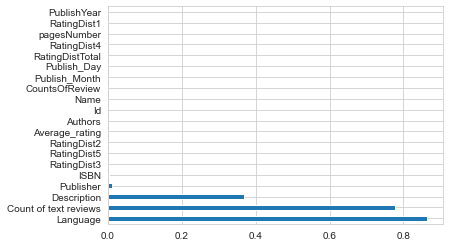

In [12]:
missing_percentage.plot(kind="barh")

Most of null values can be found in Language, Count of text reviews, Description and Publisher column.

We can omit these columns from the dataframe since they are not necessary for the EDA.

### Outliers analysis

From describe() function, we saw pagesNumber column has some interesting number, let's investigate further.

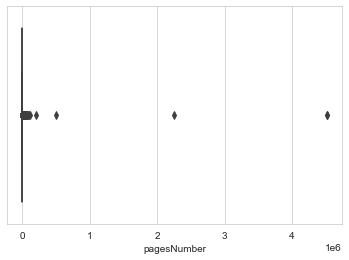

In [13]:
book_df.pagesNumber.max()

sns.boxplot(data=book_df, x = "pagesNumber")
plt.show()

From the graph, we can clearly see that most books have less than 100000 pages.

After some investigation, there are indeed several books that have quite many pages *(More than 100000 pages)*, however, it may be best to avoid having too many extreme values in the dataframe and thus we can remove those records.

In [14]:
book_df.drop(book_df[book_df.pagesNumber > 100000].index, inplace=True)
#book_df[book_df.pagesNumber > 100000] #Verify

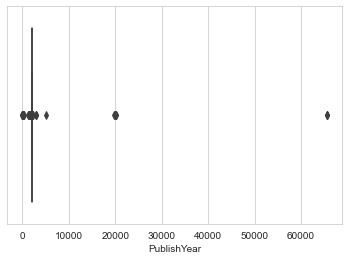

In [15]:
book_df.PublishYear.max()

sns.boxplot(data=book_df, x = "PublishYear")
plt.show()

From the graph like pagesNumber, PublishYear column has some interesting numbers, let's investigate further.

In [16]:
sorted(book_df.PublishYear.unique())

[1,
 8,
 162,
 199,
 200,
 202,
 208,
 299,
 1192,
 1376,
 1384,
 1385,
 1387,
 1623,
 1730,
 1753,
 1824,
 1825,
 1833,
 1835,
 1836,
 1837,
 1838,
 1839,
 1841,
 1846,
 1847,
 1850,
 1851,
 1852,
 1854,
 1856,
 1859,
 1862,
 1863,
 1864,
 1865,
 1866,
 1868,
 1869,
 1871,
 1874,
 1878,
 1879,
 1880,
 1881,
 1884,
 1885,
 1886,
 1888,
 1889,
 1892,
 1893,
 1894,
 1895,
 1896,
 1897,
 1898,
 1899,
 1900,
 1901,
 1902,
 1903,
 1904,
 1905,
 1906,
 1907,
 1908,
 1909,
 1910,
 1911,
 1912,
 1913,
 1914,
 1915,
 1916,
 1917,
 1918,
 1919,
 1920,
 1921,
 1922,
 1923,
 1924,
 1925,
 1926,
 1927,
 1928,
 1929,
 1930,
 1931,
 1932,
 1933,
 1934,
 1935,
 1936,
 1937,
 1938,
 1939,
 1940,
 1941,
 1942,
 1943,
 1944,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 198

Year 1, 8, 162, 199, 200, etc seem strange and need for further investigation

In [17]:
book_df[book_df.PublishYear < 1000]

,Id,Name,RatingDist1,pagesNumber,RatingDist4,RatingDistTotal,Publish_Day,Publish_Month,Publisher,CountsOfReview,PublishYear,Language,Authors,Average_rating,RatingDist2,RatingDist5,ISBN,RatingDist3,Description,Count of text reviews
44378,76978,"The Secret of the Old Mill (The Hardy Boys, #3)",1:69,174,4:2173,total:6706,1,6,Grosset & Dunlap,209,162,eng,Franklin W. Dixon,3.86,2:333,5:2036,0448089033,3:2095,NaN,NaN
22313,1155177,Agatha Raisin and the Witch of Wyckhadden (Aga...,1:37,196,4:2612,total:6598,17,11,St Martin's Minotaur,16,208,eng,M.C. Beaton,3.75,2:313,5:1366,0312204949,3:2270,"Eye of newt, toe of frog ... and murder most f...",16.00
29198,1967481,"Le grand carnage (Sin City, #3)",0.166666667,164,4.301388889,total:15415,28,8,NaN,0,200,fre,Frank Miller,4.11,0.423611111,4.392361111,2878270746,2.045833333,La vieille ville de Sin City est une forteress...,NaN
166970,2393134,"Kenshin Le Vagabond, tome 05: L'avenir du Kenj...",1:11,182,0.768055556,total:2787,1,5,Glénat,1,199,fre,Nobuhiro Watsuki,4.32,2:58,1.213194444,272342796X,0.40625,Raijuta Isurugi est un homme mystérieux qui se...,NaN
244689,2589506,"Das Wasser, in dem wir schlafen",1:02,160,4:06,total:22,3,9,NaN,0,200,ger,Rabea Edel,3.14,2:05,5:03,3442736943,3:06,"Zwei Schwestern haben sich, nachdem ihre Mutte...",NaN
309850,2762952,Haus der Träume,1:51,407,0.570138889,total:1605,8,5,Blanvalet,0,200,ger,Colleen McCullough,3.69,0.184722222,0.477777778,3442363500,0.429861111,"Harriet ist ein Röntgenstrahltechniker, der an...",NaN
324506,2804271,General Guide to the Isle of May,1:00,64,4:00,total:1,1,5,Tervor Ltd.,0,200,eng,James Allan,5.00,2:00,5:01,953819108,3:00,NaN,NaN
367424,2920025,Bibliographies For Biblical Research,1:00,8,4:00,total:0,31,12,Mellen Biblical Press,0,200,NaN,Watson E. Mills,0.00,2:00,5:00,077342492X,3:00,A bibliographical series of ten volumes explor...,NaN
109103,3303075,Adding and Subtracting Book 3 (Key to Fractions),1:00,40,4:00,total:0,1,1,NaN,0,1,NaN,Steven Rasmussen,0.00,2:00,5:00,913684937,3:00,NaN,NaN
109105,3303078,Dividing Book 3 (Key to Decimals),1:00,48,4:00,total:0,1,1,NaN,0,1,NaN,Steven Rasmussen,0.00,2:00,5:00,913684236,3:00,NaN,NaN


In [18]:
book_df[book_df.PublishYear > 2022]

,Id,Name,RatingDist1,pagesNumber,RatingDist4,RatingDistTotal,Publish_Day,Publish_Month,Publisher,CountsOfReview,PublishYear,Language,Authors,Average_rating,RatingDist2,RatingDist5,ISBN,RatingDist3,Description,Count of text reviews
25597,42574,The Water Babies: A Fairy Tale for a Land Baby,1:494,372,4:1929,total:7645,21,8,Adamant Media Corporation,0,3002,NaN,Charles Kingsley,3.42,2:1132,5:1711,0543956121,3:2379,NaN,NaN
5049,1012420,Jared Grace's How-to-Draw Book,1:0,48,4:0,total:0,31,12,Simon Scribbles,0,2030,NaN,Benjamin Harper,0.00,2:0,5:0,1416949526,3:0,The <em>Spiderwick Stained Glass Book</em> fea...,0.00
38977,1193170,The Back Door of Midnight,1:28,224,4:1360,total:4167,30,12,Simon Pulse,0,2030,NaN,Elizabeth Chandler,4.22,2:134,5:1950,0689866429,3:695,Elizabeth Chandler is a pseudonym for Mary Cla...,0.00
30825,1271191,Rama Beyond Price (Clay Sanskrit Library),1:0,638,4:0,total:0,1,1,Clay Sanskrit,0,20067,NaN,Murari,0.00,2:0,5:0,0814782957,3:0,"Rama Beyond Price, a dramatized remake of the ...",0.00
23871,1359960,Guidance For Women In Twelfth Century Convents,1:0,203,4:2,total:2,6,11,Brewer,0,2100,NaN,Jocelyn Wogan-Browne,4.00,2:0,5:0,0859918254,3:0,A significant and lasting contribution to the ...,0.00
31274,1694730,Global Politics: A New Introduction,1:4,568,4:21,total:64,1,1,Routledge,0,20099,NaN,Jenny Edkins,3.62,2:3,5:15,0415431301,3:21,Global Politics: A New Introduction is an inno...,0.00
14830,1746177,"La femme de guerre (Les colonnes du ciel, #3)",1:0,270,4:2,total:13,20,11,Pocket,0,65535,fre,Bernard Clavel,3.31,2:2,5:2,2266136682,3:7,"En cette année 1639, quel contraste entre la F...",NaN
4327,1814546,My Scrumptious Scottish Dumplings: The Life of...,1:02,192,4:26,total:88,30,7,Simon Pulse,0,2030,NaN,Cherry Whytock,3.38,2:09,5:10,068986552X,3:41,"<br />""Almost forgot, Cherub, I got something ...",NaN
25805,1868339,National Geographic Countries of the World: Ke...,1:00,64,4:00,total:6,28,2,National Geographic Children's Books,1,2030,NaN,Bridget Giles,3.67,2:00,5:02,792276280,3:04,"Welcome to Kenya, land of light and infinite v...",NaN
28508,1874849,Ouest,1:05,266,4:22,total:61,25,8,V. Hamy,4,2099,fre,François Vallejo,3.44,2:07,5:11,2878582357,3:16,"Un soir, aux tréfonds des terres normandes, un...",NaN


An attempt to fix some of the values in PublishYear column

In [19]:
#Fix year > 2022
book_df.loc[book_df.Id == 42574, "PublishYear"] = 2006
book_df.loc[book_df.Id == 1193170, "PublishYear"] = 2010
book_df.loc[book_df.Id == 1359960, "PublishYear"] = 2003
book_df.loc[book_df.Id == 1271191, "PublishYear"] = 2007
book_df.loc[book_df.Id == 1694730, "PublishYear"] = 2009
book_df.loc[book_df.Id == 1746177, "PublishYear"] = 1992
book_df.loc[book_df.Id == 2102912, "PublishYear"] = 1935
book_df.loc[book_df.Id == 2685378, "PublishYear"] = 2015
book_df.loc[book_df.Id == 4310347, "PublishYear"] = 2013
book_df.loc[book_df.Id == 582684, "PublishYear"] = 1978
book_df.loc[book_df.Id == 657982, "PublishYear"] = 2004

Since it is very time-consuming to verify the published year for all books, I decided it would be better to keep the analysis range of the books from year 1700 to 2022.

In [20]:
book_df = book_df[(book_df.PublishYear >= 1700) & (book_df.PublishYear <= 2022)]

### Data types converting

In [21]:
book_df.loc[:, ["RatingDist1", "RatingDist2", "RatingDist3", "RatingDist4", "RatingDist5", "RatingDistTotal"]]

,RatingDist1,RatingDist2,RatingDist3,RatingDist4,RatingDist5,RatingDistTotal
0,1:9896,2:25317,3:159960,4:556485,5:1546466,total:2298124
1,1:12455,2:37005,3:211781,4:604283,5:1493113,total:2358637
2,1:108202,2:130310,3:567458,4:1513191,5:4268227,total:6587388
3,1:11896,2:49353,3:288821,4:706082,5:1504505,total:2560657
4,1:10128,2:24849,3:194848,4:630534,5:1749958,total:2610317
...,...,...,...,...,...,...
40885,1:0,2:1,3:6,4:3,5:15,total:25
40886,1:0,2:0,3:0,4:0,5:0,total:0
40887,1:2,2:11,3:34,4:35,5:39,total:121
40888,1:0,2:0,3:0,4:0,5:0,total:0


All these columns would contain redundant number and its type is in string, we need to convert these into integer. Also, in conlumns RatingDist1, RatingDist2, RatingDist3, RatingDist4, RatingDist5 have inconsistent pattern, hence we need to drop any records which has different pattern to convert the type.

In [22]:
book_df = book_df[book_df.RatingDist1.str.contains(pat = "1:")]
book_df = book_df[book_df.RatingDist2.str.contains(pat = "2:")]
book_df = book_df[book_df.RatingDist3.str.contains(pat = "3:")]
book_df = book_df[book_df.RatingDist4.str.contains(pat = "4:")]
book_df = book_df[book_df.RatingDist5.str.contains(pat = "5:")]

After several attempts to solve the problem of inconsistent string format, I decided to use the above codes to drop inconsistent pattern. *(Noted that the above code may not be the best method to solve the problem)*

In [23]:
book_df['RatingDistTotal'] = book_df['RatingDistTotal'].apply(lambda rating: rating.split(':')[1]).astype('int')
book_df['RatingDist1'] = book_df['RatingDist1'].apply(lambda rating: rating.split(':')[1]).astype('int')
book_df['RatingDist2'] = book_df['RatingDist2'].apply(lambda rating: rating.split(':')[1]).astype('int')
book_df['RatingDist3'] = book_df['RatingDist3'].apply(lambda rating: rating.split(':')[1]).astype('int')
book_df['RatingDist4'] = book_df['RatingDist4'].apply(lambda rating: rating.split(':')[1]).astype('int')
book_df['RatingDist5'] = book_df['RatingDist5'].apply(lambda rating: rating.split(':')[1]).astype('int')

Verify the changes have been made

In [24]:
book_df.loc[:, ["RatingDist1", "RatingDist2", "RatingDist3", "RatingDist4", "RatingDist5", "RatingDistTotal"]].describe()

,RatingDist1,RatingDist2,RatingDist3,RatingDist4,RatingDist5,RatingDistTotal
count,1758767.00,1758767.00,1758767.00,1758767.00,1758767.00,1758767.00
mean,88.09,188.74,676.66,1181.02,1587.26,3721.77
std,2274.67,3626.30,11363.47,21038.58,38009.38,72840.97
min,0.00,0.00,0.00,0.00,-2.00,-2.00
25%,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,1.00,1.00,1.00,4.00
75%,1.00,2.00,8.00,10.00,9.00,30.00
max,550388.00,544093.00,1013165.00,1912159.00,4608992.00,7094687.00


Usually, on Goodreads rating section we may not find a negative vote in the number of stars given to a book, hence the RatingDist5 and RatingDistTotal having a negative value seems to be wrong. Let's investigate

In [25]:
book_df[book_df.RatingDist5 < 0]
book_df[book_df.RatingDistTotal < 0]

,Id,Name,RatingDist1,pagesNumber,RatingDist4,RatingDistTotal,Publish_Day,Publish_Month,Publisher,CountsOfReview,PublishYear,Language,Authors,Average_rating,RatingDist2,RatingDist5,ISBN,RatingDist3,Description,Count of text reviews
171209,3485352,Nonlinear Dynamics and Statistical Theories fo...,0,551,0,-2,11,5,Cambridge University Press,0,2006,NaN,Andrew J. Majda,5.00,0,-2,521834414,0,This introduction to the important interplay b...,NaN


Seems like only 1 record has this problem, we can omit this from the dataframe

In [26]:
book_df.drop(book_df[book_df.RatingDist5 < 0].index, inplace=True)
book_df[book_df.RatingDistTotal < 0] #Verify

,Id,Name,RatingDist1,pagesNumber,RatingDist4,RatingDistTotal,Publish_Day,Publish_Month,Publisher,CountsOfReview,PublishYear,Language,Authors,Average_rating,RatingDist2,RatingDist5,ISBN,RatingDist3,Description,Count of text reviews


In [27]:
len(book_df)

1758764

The final version of the dataframe ready for analysis has 1758764 records.

## Exploratory Data Analysis

In [28]:
book_df.head(20)

,Id,Name,RatingDist1,pagesNumber,RatingDist4,RatingDistTotal,Publish_Day,Publish_Month,Publisher,CountsOfReview,PublishYear,Language,Authors,Average_rating,RatingDist2,RatingDist5,ISBN,RatingDist3,Description,Count of text reviews
0,1,Harry Potter and the Half-Blood Prince (Harry ...,9896,652,556485,2298124,16,9,Scholastic Inc.,28062,2006,eng,J.K. Rowling,4.57,25317,1546466,NaN,159960,NaN,NaN
1,2,Harry Potter and the Order of the Phoenix (Har...,12455,870,604283,2358637,1,9,Scholastic Inc.,29770,2004,eng,J.K. Rowling,4.50,37005,1493113,0439358078,211781,NaN,NaN
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,108202,309,1513191,6587388,1,11,Scholastic Inc,75911,2003,eng,J.K. Rowling,4.47,130310,4268227,NaN,567458,NaN,NaN
3,4,Harry Potter and the Chamber of Secrets (Harry...,11896,352,706082,2560657,1,11,Scholastic,244,2003,eng,J.K. Rowling,4.42,49353,1504505,0439554896,288821,NaN,NaN
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,10128,435,630534,2610317,1,5,Scholastic Inc.,37093,2004,eng,J.K. Rowling,4.57,24849,1749958,043965548X,194848,NaN,NaN
5,6,Harry Potter and the Goblet of Fire (Harry Pot...,9419,734,606800,2431085,28,9,Scholastic,31978,2002,eng,J.K. Rowling,4.56,24282,1612165,NaN,178419,NaN,NaN
6,8,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...",402,2690,4650,43968,13,9,Scholastic,166,2004,eng,J.K. Rowling,4.78,283,37432,0439682584,1201,NaN,NaN
7,9,"Unauthorized Harry Potter Book Seven News: ""Ha...",0,152,7,28,26,4,Nimble Books,1,2005,en-US,W. Frederick Zimmerman,3.79,5,10,0976540606,6,NaN,NaN
8,10,"Harry Potter Collection (Harry Potter, #1-6)",257,3342,4358,30313,12,9,Scholastic,809,2005,eng,J.K. Rowling,4.73,218,24406,0439827604,1074,NaN,NaN
9,12,The Ultimate Hitchhiker's Guide: Five Complete...,3443,815,75683,274268,1,11,Gramercy Books,255,2005,eng,Douglas Adams,4.37,7613,157499,0517226952,30030,NaN,NaN


Columns to analyze:
1. Name
2. Authors
3. Rating columns (RatingDist1, RatingDist2, RatingDist3, RatingDist4, RatingDist5, RatingDistTotal, Average_rating)
4. Publishers
5. Language
6. Pages number
7. Counts of review
8. Time Data (Publish_Day, Publish_Month, PublishYear)

### Analysis on Book titles

EDA question: How many different book titles can be found in the dataset ?

In [29]:
book_df.Name.nunique()

1585220

**Observation:** There are more than 1.7 million records but only more than 1.5 million records are unique, meaning there could be books with the same name but are published by different Publishers.

In [30]:
book_df[book_df.Name.duplicated(keep = False)].loc[:, ["Id", "Name", "Publisher", "Authors"]].sort_values('Name')

,Id,Name,Publisher,Authors
187321,3529667,"""A Trade Like Any Other"": Female Singers and D...",University of Texas Press,Karin van Nieuwkerk
33743,560791,"""A Trade Like Any Other"": Female Singers and D...",University of Texas Press,Karin van Nieuwkerk
202956,3573192,"""Ace"" Any Test",Career Press,Ron Fry
145488,2340088,"""Ace"" Any Test",Career Press,Ron Fry
35550,362418,"""After Mecca"": Women Poets and the Black Arts ...",Rutgers University Press,Cheryl Clark
...,...,...,...,...
4256,1210051,鹿鼎記（一）,遠流出版事業股份有限公司,Jin Yong
269,1500766,"�buen Viaje! Level 2, Student Edition",McGraw-Hill Education,Protase E. Woodford
10970,1734000,"�buen Viaje! Level 2, Student Edition",McGraw-Hill Education,Protase E. Woodford
161298,4489958,"�umar Ibn Al-Farid: Sufi Verse, Saintly Life",Paulist Press,'Umar Ibn 'Ali Ibn Al-Farid


**Observation:** More than 30 thousand records of duplication, including those with different publishers. But are there 100% duplicated records ?

In [31]:
book_df[book_df.duplicated(keep=False)]

,Id,Name,RatingDist1,pagesNumber,RatingDist4,RatingDistTotal,Publish_Day,Publish_Month,Publisher,CountsOfReview,PublishYear,Language,Authors,Average_rating,RatingDist2,RatingDist5,ISBN,RatingDist3,Description,Count of text reviews
44113,76770,Recommended Dietary Allowances,0,302,0,0,1,2,National Academies Press,0,1989,NaN,National Research Council,0.00,0,0,0309046335,0,NaN,NaN
44114,76772,The Circle Comes Full: New England Southern Ba...,0,400,0,0,1,1,Providence House Publishers,0,1998,NaN,Merwyn Borders,0.00,0,0,1577360877,0,NaN,NaN
44115,76773,The God We Never Knew: Beyond Dogmatic Religio...,7,192,279,749,19,5,HarperOne,65,2015,NaN,Marcus J. Borg,4.21,25,335,0060610352,103,NaN,NaN
44116,76774,Living the Heart of Christianity: A Companion ...,1,180,26,61,31,10,HarperOne,2,2006,NaN,Marcus J. Borg,4.10,3,23,0061118427,8,NaN,NaN
44122,76784,A Stone of the Heart,6,256,36,93,1,8,Penguin Books,0,1990,NaN,John Brady,3.33,13,10,0140138471,28,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49928,86037,The Eleanor Roosevelt Papers: The Human Rights...,1,1121,1,8,1,1,Gale Cengage,0,2007,NaN,Eleanor Roosevelt,4.12,0,5,0684314754,1,NaN,NaN
50041,86199,A Place in El Paso: A Mexican-American Childhood,0,212,0,0,1,3,University of New Mexico Press,0,1996,NaN,Gloria Lopes-Stafford,0.00,0,0,0826316875,0,NaN,NaN
50042,86203,Paso Adelante,1,400,0,2,11,7,Cengage Learning,1,2006,NaN,Sharon Ahern Fechter,3.00,0,1,0618253327,0,NaN,NaN
50043,86199,A Place in El Paso: A Mexican-American Childhood,0,212,0,0,1,3,University of New Mexico Press,0,1996,NaN,Gloria Lopes-Stafford,0.00,0,0,0826316875,0,NaN,NaN


**Observation:** There are 224 duplicated records and since there are more than 1.7 million books, we can safely delete those from the dataframe.

EDA question: What is the most popular book ?

In [32]:
book_df[book_df.Average_rating == 5]

,Id,Name,RatingDist1,pagesNumber,RatingDist4,RatingDistTotal,Publish_Day,Publish_Month,Publisher,CountsOfReview,PublishYear,Language,Authors,Average_rating,RatingDist2,RatingDist5,ISBN,RatingDist3,Description,Count of text reviews
230,380,A Colorful Symphony: Full Score,0,68,0,1,1,5,"G. Schirmer, Inc.",1,1997,NaN,Robert Xavier Rodríguez,5.00,0,1,0793565561,0,NaN,NaN
238,392,"Bullets, Badges, and Bullshit",0,444,0,2,6,3,PublishAmerica,0,2006,NaN,Phil T. O'Brien,5.00,0,2,1424124255,0,NaN,NaN
276,438,"New York Trilogy: New York Underground, Trappe...",0,156,0,2,20,4,iUniverse,0,2000,NaN,Paul Hallasy,5.00,0,2,0595002234,0,NaN,NaN
320,499,21st Century Mysteries: Nikola Tesla: Federal ...,0,23931,0,2,3,2,Progressive Management,0,2006,NaN,U.S. Government,5.00,0,2,1422004848,0,NaN,NaN
501,752,The Guitar Chord Deck,0,45,0,2,1,12,Music Sales,0,1999,NaN,Ed Lozano,5.00,0,2,0825617545,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40736,999581,The Brainerd Journal: A Mission to the Cheroke...,0,586,0,1,1,11,University of Nebraska Press,1,1998,NaN,Joyce Phillips,5.00,0,1,0803237189,0,The journal of the Brainerd Mission is an indi...,1.00
40807,999797,An Arrow Full of Quivers,0,256,0,1,1,12,Ulverscroft,0,1996,NaN,Robert Clifford,5.00,0,1,0708936431,0,"A collection of stories, anecdotes and slices ...",0.00
40861,999938,Cinema for Italian Conversation: Ciak... si pa...,0,290,0,1,1,5,Focus Publishing/R. Pullins Co.,1,2005,NaN,Piero Garofalo,5.00,0,1,1585100943,0,Ciak... si parla italiano is a text designed s...,1.00
40866,999950,Albertanus of Brescia,0,168,0,1,29,1,University of Pennsylvania Press,0,1992,NaN,James M. Powell,5.00,0,1,0812231384,0,Albertanus of Brescia is an important figure i...,0.00


**Observation:** There are too many results, we may need to narrow down more.

In [33]:
book_df[book_df.RatingDistTotal == book_df.RatingDistTotal.max()]

,Id,Name,RatingDist1,pagesNumber,RatingDist4,RatingDistTotal,Publish_Day,Publish_Month,Publisher,CountsOfReview,PublishYear,Language,Authors,Average_rating,RatingDist2,RatingDist5,ISBN,RatingDist3,Description,Count of text reviews
196492,4593339,Ο Χάρι Πότερ και η φιλοσοφική λίθος (Χάρι Πότε...,119534,360,1621963,7094687,1,11,Εκδόσεις Ψυχογιός,51,1998,gre,J.K. Rowling,4.47,140565,4608992,NaN,603633,<i>Alternate cover edition can be found <a hre...,NaN


**Observation:** Quite interesting result, we can add one more condition to find the most popular title.

In [34]:
book_df[book_df.RatingDist5 == book_df.RatingDist5.max()]

,Id,Name,RatingDist1,pagesNumber,RatingDist4,RatingDistTotal,Publish_Day,Publish_Month,Publisher,CountsOfReview,PublishYear,Language,Authors,Average_rating,RatingDist2,RatingDist5,ISBN,RatingDist3,Description,Count of text reviews
196492,4593339,Ο Χάρι Πότερ και η φιλοσοφική λίθος (Χάρι Πότε...,119534,360,1621963,7094687,1,11,Εκδόσεις Ψυχογιός,51,1998,gre,J.K. Rowling,4.47,140565,4608992,NaN,603633,<i>Alternate cover edition can be found <a hre...,NaN


In [35]:
book_df[(book_df.Average_rating == 5) & (book_df.RatingDistTotal > 10000)]

,Id,Name,RatingDist1,pagesNumber,RatingDist4,RatingDistTotal,Publish_Day,Publish_Month,Publisher,CountsOfReview,PublishYear,Language,Authors,Average_rating,RatingDist2,RatingDist5,ISBN,RatingDist3,Description,Count of text reviews


**Observation:** Selecting book with average rating of 5 and with more than 10000 reviews is likely to get the answer for the question. However, the above code block did not return any result. We can try to decrease the standard

In [36]:
book_df[(book_df.Average_rating == 4.5) & (book_df.RatingDistTotal > 10000)].sort_values("Average_rating", ascending = False).head(10).loc[:, ["Id", "Name", "Authors", "RatingDistTotal", "Average_rating"]]

,Id,Name,Authors,RatingDistTotal,Average_rating
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,2358637,4.50
14064,1642703,Der Herr der Ringe: Die Gefährten / Die zwei T...,J.R.R. Tolkien,550635,4.50
35184,462306,The Complete Works: Red Leather Edition,William Shakespeare,50824,4.50
34308,460802,The Complete Works,William Shakespeare,50824,4.50
25166,444327,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,2376146,4.50
16289,428548,The Complete Works (The Globe Illustrated Shak...,William Shakespeare,50826,4.50
16211,428439,"Complete Works of Shakespeare, The, Portable E...",William Shakespeare,50826,4.50
15144,426441,Complete Works of William Shakespeare,William Shakespeare,50826,4.50
196556,4593490,Ο Χάρι Πότερ και το τάγμα του Φοίνικα (Χάρι Πό...,J.K. Rowling,2523750,4.50
48162,385250,"The Jolly Postman, or Other People's Letters",Janet Ahlberg,11381,4.50


**Observation:** To answer the EDA question *(What is the most popular book)*, Harry Potter and the Order of the Phoenix by J.K. Rowling is the most popular. The Lord of the Rings by J.R.R. Tolkien in german version is in second place while third plat the The Complete Works: Red Leather Edition by William Shakespeare

EDA question: Best book released every year?

To answer the question, I used the method which consist of: sorted the dataframe by release year, average rating and RatingDistTotal columns. The book which has the highest average rating and the total number of people giving rating should be the best book released in that year. Then, used a for loop to loop through each publish year and select the record ranked first in order.

In [37]:
df_test = book_df.sort_values(by=["PublishYear", "RatingDistTotal", "Average_rating"], ascending=[True, False, False]).loc[:, ["Id", "Name", "Authors", "PublishYear", "Average_rating", "RatingDistTotal"]]
df_test

,Id,Name,Authors,PublishYear,Average_rating,RatingDistTotal
37491,3098402,Three Distinct Knocks On the Door of the Most ...,Samuel Pritchard,1730,0.00,0
189588,2448024,Discovering Geometry: An Investigative Approac...,Michael Serra,1753,3.67,3
87877,4265642,Self Esteem In The Classroom: Techniques For T...,Lila Swell,1753,0.00,0
3274,1907756,West-Indian pretensions refuted: being an extr...,James Stephen,1824,5.00,1
111834,3311966,A Universal Biographical Dictionary,Charles N. Baldwin,1825,4.00,1
...,...,...,...,...,...,...
38152,4109529,"Ponds, Pools and Puddles (Collins New Naturali...",Jeremy Biggs,2021,0.00,0
60225,4177760,Rose of Jericho and Other Stories,Tage Aurell,2021,0.00,0
80388,4241942,"The Living Word: Inner Land � "" a Guide Into t...",Eberhard Arnold,2021,0.00,0
87246,4263641,Computational Photography: Mastering New Techn...,Ramesh Raskar,2021,0.00,0


In [38]:
i = []
for year in range(1730, 2023):
    try:
        test_1 = df_test[df_test.PublishYear == year].iloc[0]
        i.append(test_1)
        df_test_1 = pd.DataFrame(i)
    except:
        continue

df_test_1 = df_test_1.reset_index()
df_test_1 = df_test_1.drop(columns=["index"])
df_test_1

,Id,Name,Authors,PublishYear,Average_rating,RatingDistTotal
0,3098402,Three Distinct Knocks On the Door of the Most ...,Samuel Pritchard,1730,0.00,0
1,2448024,Discovering Geometry: An Investigative Approac...,Michael Serra,1753,3.67,3
2,1907756,West-Indian pretensions refuted: being an extr...,James Stephen,1824,5.00,1
3,3311966,A Universal Biographical Dictionary,Charles N. Baldwin,1825,4.00,1
4,2550274,Letter addressed to the members of the Society...,Edward Smith,1833,0.00,0
...,...,...,...,...,...,...
163,45495,El alquimista: una fábula para seguir tus sueños,Paulo Coelho,2018,3.87,1956934
164,44184,Monster,Walter Dean Myers,2019,3.72,58109
165,1331682,Beezus and Ramona,Beverly Cleary,2020,4.00,92039
166,4039639,The Kingdoms and the Elves of the Reaches 2: K...,Robert Stanek,2021,3.19,115


### Analysis on Authors

EDA question: How many different can be found in the dataset?

In [39]:
book_df.Authors.nunique()

671681

Only a third number of authors compared to the number of book titles, which leads to the next EDA question: how many books would a author write?

In [40]:
book_df.groupby('Authors')['Name'].count().sort_values(ascending = False).head(10)

Authors
Anonymous                           2255
Unknown                             2007
William Shakespeare                 1042
National Research Council            884
Cram101 Textbook Reviews             876
Fodor's Travel Publications Inc.     832
Francine Pascal                      821
Harold Bloom                         762
Various                              729
Isaac Asimov                         631
Name: Name, dtype: int64

Excluding unknown writers, we can clearly see that William Shakespeare wrote the most number of books.

EDA question: Who is the most popular author based on rating?

### Analysis on Rating

EDA question: What is the distribution of average rating ?

### Analysis on Publishers

EDA question: Which publishers published the most number of books ?

EDA question: Which book is published by several publishers ?

### Analysis on Language

EDA question: Which language is written in most of the books ?

EDA question: Which book is the most popular in each language written ?

### Analysis on Pages number

EDA question: Is there a correlation between pages number and average rating ?

EDA question: for each year, how many pages can be found in a book ?

### Analysis on Counts of review

EDA question: Is there a correlation between Counts of review and average rating ?